In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:

df['Classes'] = np.where(df['Classes'].str.contains('not'), 'not fire', 'fire')
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
df['Classes'] = np.where(df['Classes'].str.contains('not'), 0, 1)

In [11]:
### Independent and Dependent Features
X=df.drop('FWI',axis=1)
y=df['FWI']
X.head(),y.head()

(   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
 0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
 1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
 2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
 3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
 4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0,
 0    0.5
 1    0.4
 2    0.1
 3    0.0
 4    0.5
 Name: FWI, dtype: float64)

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

In [14]:
## Feature selection
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

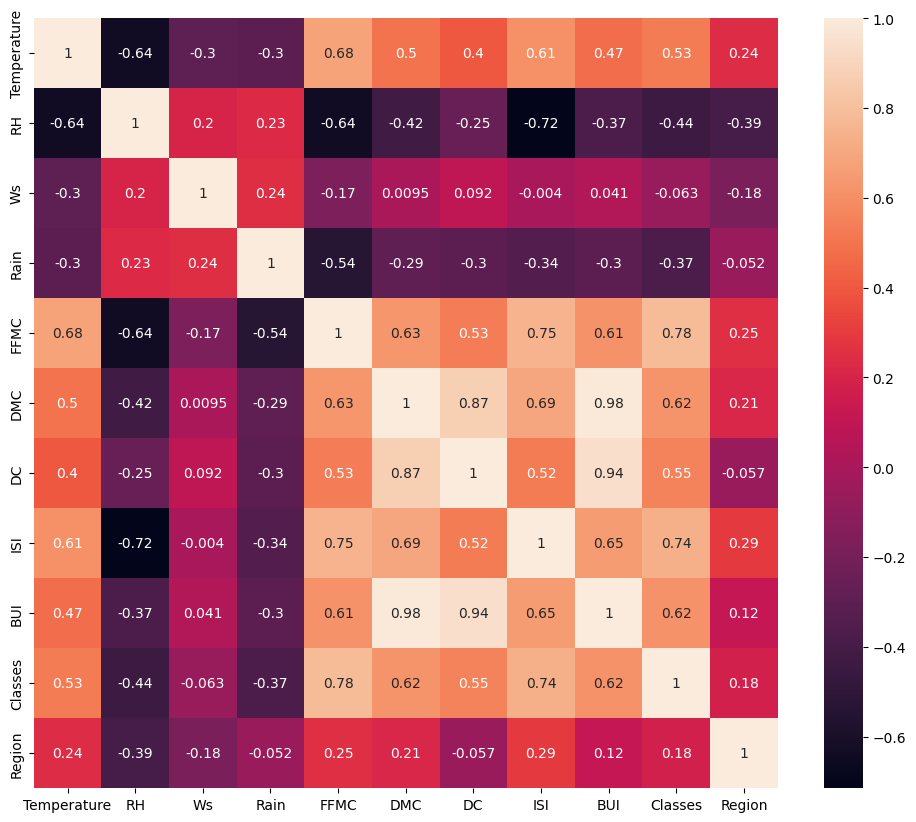

In [15]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [16]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
## threshold -- Domain expertise
correlation(X_train,0.80)

{'BUI', 'DC'}

In [18]:
### drop features which are highly correlated
X_train.drop(correlation(X_train,0.85),axis=1,inplace=True)
X_test.drop(correlation(X_test,0.85),axis=1,inplace=True)

In [19]:
X_train.shape,X_test.shape

((170, 9), (73, 9))

In [20]:
## Feature scaling and standerdization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Text(0.5, 1.0, 'After Scaling')

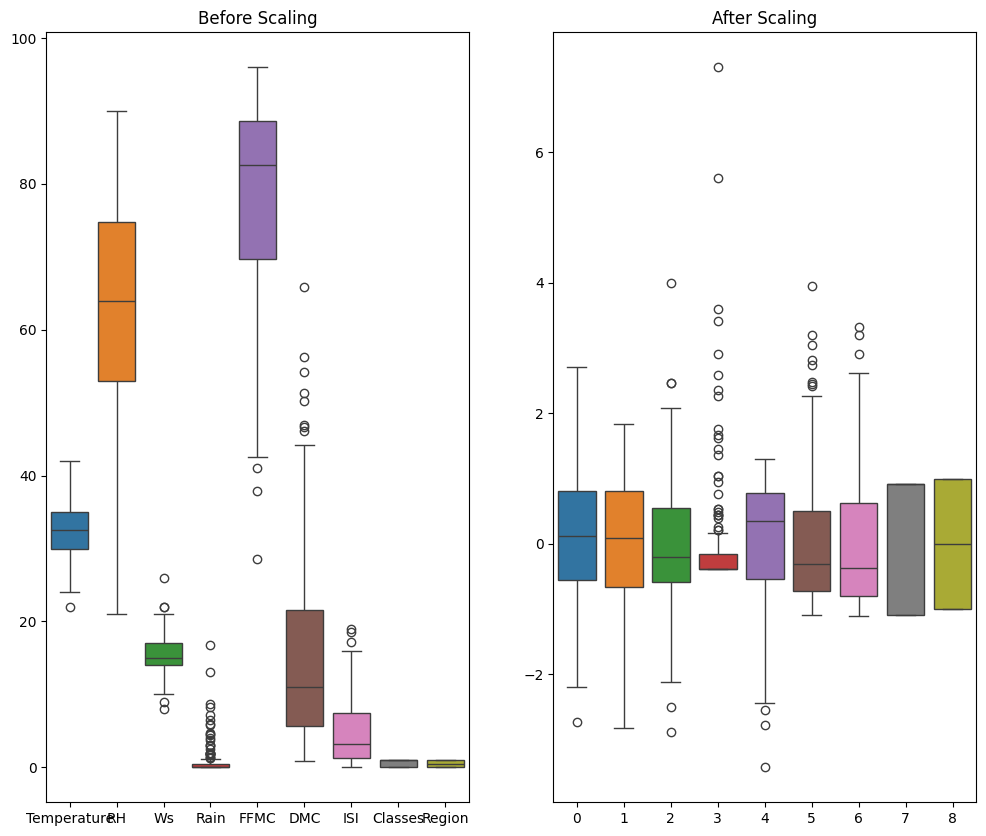

In [21]:
## Box plot to check for outliers 
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=scaler.fit_transform(X_train))
plt.title('After Scaling')

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear reg model

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = model.score(X_test,y_test)
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {accuracy*100:.2f} %')

MSE: 0.6829306792403719,
R2: 0.9847206874554418,
MAE: 0.5648036371485076,
Accuracy: 98.47 %


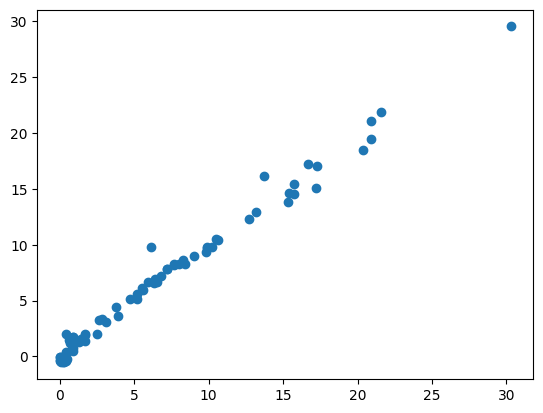

In [26]:
plt.scatter(y_test,y_pred)


## lasso  regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso = Lasso(alpha=0.01)

In [28]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [29]:
y_pred = lasso.predict(X_test)

In [30]:
mea = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = lasso.score(X_test,y_test)
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {accuracy*100:.2f} %')

MSE: 0.6829306792403719,
R2: 0.9846486142384526,
MAE: 0.5692654706295845,
Accuracy: 98.46 %


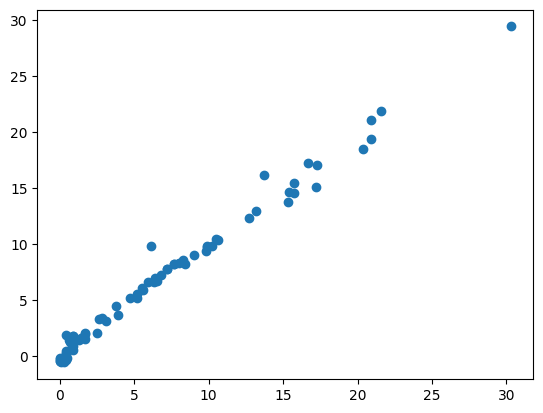

In [31]:
plt.scatter(y_test,y_pred)

## Ridge regression model

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
ridge = Ridge(alpha=0.01)

In [33]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [34]:
y_pred = ridge.predict(X_test)

MSE: 0.6831573057395437,
R2: 0.9847156171061121,
MAE: 0.5649333285338421,
Accuracy: 98.47 %


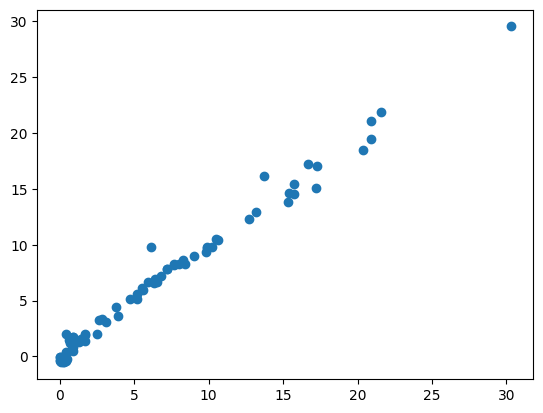

In [35]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = ridge.score(X_test,y_test)
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {accuracy*100:.2f} %')
plt.scatter(y_test,y_pred)

## Elasticnet reg

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
elastic = ElasticNet(alpha=0.1,l1_ratio=0.9)

In [37]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [38]:
y_pred = elastic.predict(X_test)

MSE: 0.9699844567072884,
R2: 0.9782983893857583,
MAE: 0.7323964704884656,
Accuracy: 97.83 %


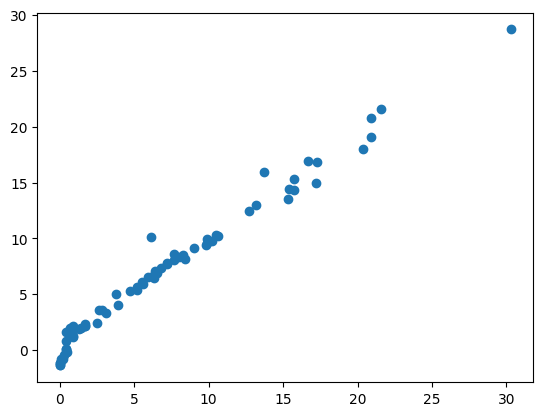

In [39]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = elastic.score(X_test,y_test)
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {accuracy*100:.2f} %')
plt.scatter(y_test,y_pred)

## Cross validation Lasso

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=10, alphas=np.arange(0.1,1,0.01))

In [41]:
lassocv.fit(X_train,y_train)

LassoCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=10)

In [42]:
y_pred = lassocv.predict(X_test) 

MSE: 0.9538740140796013,
R2: 0.9786588307828462,
MAE: 0.7148233691353046,
Accuracy: 97.87 %


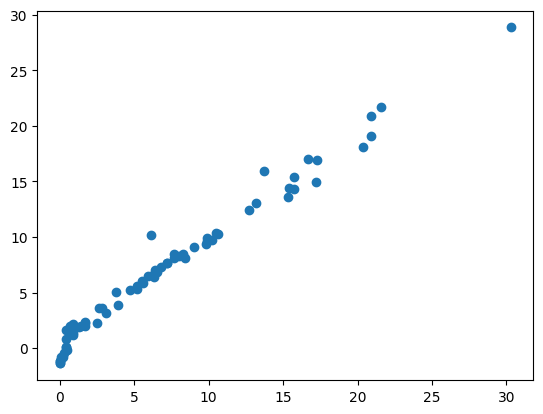

In [43]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = lassocv.score(X_test,y_test)
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {accuracy*100:.2f} %')
plt.scatter(y_test,y_pred)


In [44]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=np.arange(0.1,1,0.01), cv=5)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=5)

MSE: 0.7076727614240748,
R2: 0.9841671290663115,
MAE: 0.5842816012115102,
Accuracy: 98.42 %


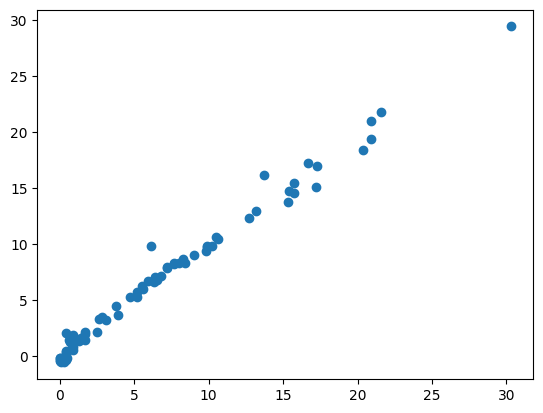

In [45]:
score = ridgecv.score(X_test, y_test)
mse = mean_squared_error(y_test, ridgecv.predict(X_test))
r2 = r2_score(y_test, ridgecv.predict(X_test))
mae = mean_absolute_error(y_test, ridgecv.predict(X_test))
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {score*100:.2f} %')
plt.scatter(y_test, ridgecv.predict(X_test))

In [46]:
## ElasticNetCV 
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=10, alphas=np.arange(0.1,1,0.01), l1_ratio=0.9)
elasticcv.fit(X_train, y_train)


ElasticNetCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
             cv=10, l1_ratio=0.9)

MSE: 0.9699844567072884,
R2: 0.9782983893857583,
MAE: 0.7323964704884656,
Accuracy: 97.83 %


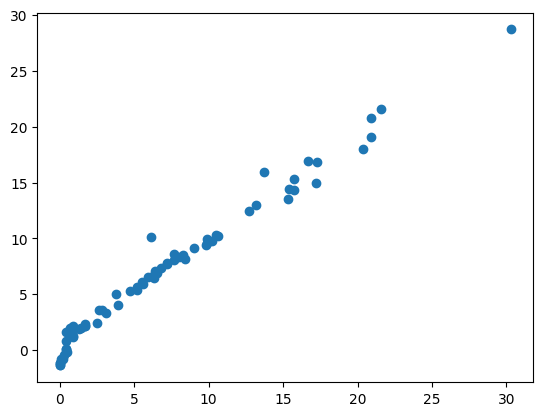

In [47]:
score = elasticcv.score(X_test, y_test)
mse = mean_squared_error(y_test, elasticcv.predict(X_test))
r2 = r2_score(y_test, elasticcv.predict(X_test))
mae = mean_absolute_error(y_test, elasticcv.predict(X_test))
print(f'MSE: {mse},\nR2: {r2},\nMAE: {mae},\nAccuracy: {score*100:.2f} %')
plt.scatter(y_test, elasticcv.predict(X_test))

#### model re bulid

In [100]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [101]:
df.shape

(243, 12)

In [102]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [103]:
X = df.drop('Temperature', axis=1)
y = df['Temperature']

In [104]:
X.shape, y.shape

((243, 11), (243,))

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145, 11), (98, 11), (145,), (98,))

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [109]:
model.fit(X_train, y_train)

LinearRegression()

In [110]:
model.score(X_train, y_train)

0.5780974236726958

In [59]:
model.coef_

array([-0.86710314, -0.8926078 ,  0.1774468 ,  1.28928237, -3.0587249 ,
       -1.18206544,  0.78222368,  4.54541918, -0.01961075, -0.30819453,
        0.06116854])

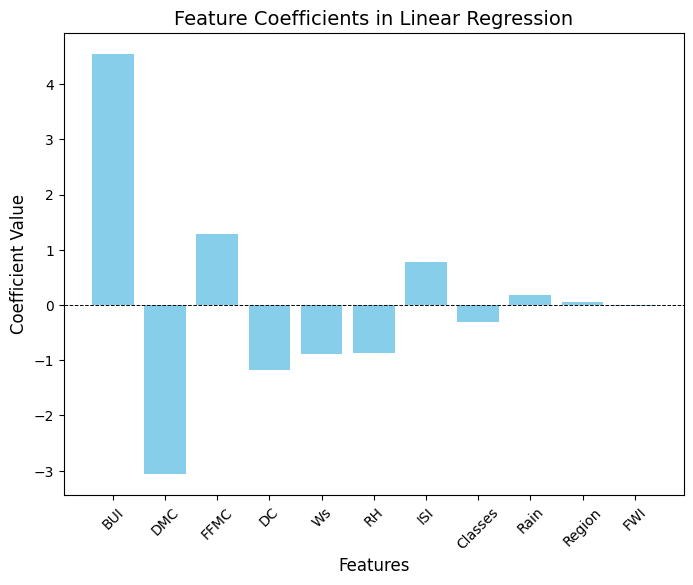

In [60]:

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by coefficient magnitude (optional)
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')  # Add a reference line at 0
plt.title('Feature Coefficients in Linear Regression', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [61]:
## retrain our model with the top 3 features
top_features = coef_df['Feature'][:3].tolist()
top_features


['BUI', 'DMC', 'FFMC']

In [62]:
X_train_top = X_train[:, [X.columns.get_loc(f) for f in top_features]]
X_test_top = X_test[:, [X.columns.get_loc(f) for f in top_features]]
y_train = y_train
y_test = y_test
scaler_top = StandardScaler()
X_train_top = scaler_top.fit_transform(X_train_top)
X_test_top = scaler_top.transform(X_test_top)

model_top = LinearRegression()
model_top.fit(X_train_top, y_train)
y_pred_top = model_top.predict(X_test_top)
print("Top features model score: ", model_top.score(X_test_top, y_test))

Top features model score:  0.469803830551924


In [63]:
test_data = [[16, 14, 77]]
test_data = scaler_top.transform(test_data)
print(test_data)
model_top.predict(test_data)

[[16. 14. 77.]]


array([208.01826245])

In [64]:
df.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
154,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,1,1
174,33,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0
100,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0.2,0,0


In [65]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [67]:
def correlation_heatmap(df,threshold=0.5):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

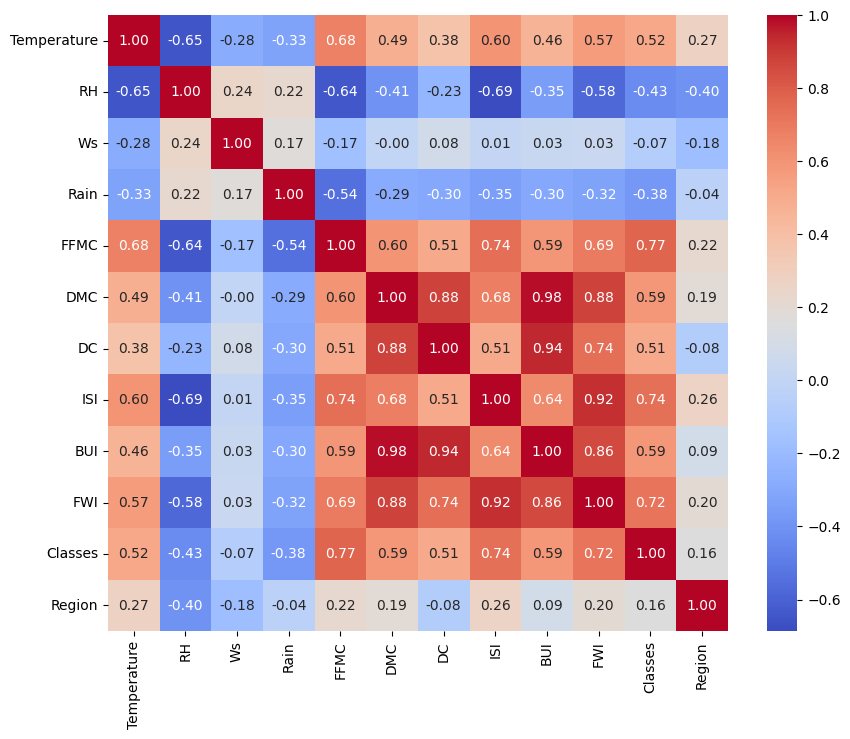

In [68]:
correlation_heatmap(df)

In [69]:
## retrain model with removing the correlated features

In [87]:
X = df.drop([ 'DMC', 'FFMC','Temperature'], axis=1)
y = df['Temperature']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [90]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_test.shape, y_test.shape

((98, 9), (98,))

In [92]:
model = LinearRegression()

In [93]:
model.fit(X_train, y_train)


LinearRegression()

In [94]:
y_pred = model.predict(X_test)

In [95]:
model.score(X_train, y_train)

0.5542225495425738

In [96]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
accuracy = model.score(X_test, y_test)
print(f'MSE: {mse}, R2: {r2}, MAE: {mae}, Accuracy: {accuracy*100:.2f} %')


MSE: 5.8625015059879155, R2: 0.5076819238264845, MAE: 1.9359245861787384, Accuracy: 50.77 %


In [97]:
## lasso reg

In [114]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [112]:
lasso.score(X_test, y_test)

0.545311138478862

In [113]:
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train, y_train)
Ridge.score(X_test, y_test)

0.5129563036084739

In [115]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.9)   
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

0.5446828566733457